### Elias Ibrahim GSR/1258/16

#### 1. MDP Implementation of a fully observable grid world environment

In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Initialize Grid world environment

grid_size = (5, 5)
actions = ['up', 'down', 'left', 'right']
num_actions = len(actions)
gamma = 0.9  # Discount factor
theta = 1e-5

In [15]:
# Reward & Reward functions

def reward(state, goal_state):
    if state == goal_state:
        return 10
    else:
        return -1
    
    
def transition(state, action):
    x, y = state
    if action == 'up':
        x = max(x - 1, 0)
    elif action == 'down':
        x = min(x + 1, grid_size[0] - 1)
    elif action == 'left':
        y = max(y - 1, 0)
    elif action == 'right':
        y = min(y + 1, grid_size[1] - 1)
    return (x, y)

In [6]:
# Initialize initial value function all states in the grid

value_function = np.zeros(grid_size)

In [27]:
# Convetionally set the goal state to the bottom-right corner of the grid world

# goal_state = (4, 4)
goal_state = (0, 3)

In [28]:
# Function to iteratively update the value function until it converges to theta

def value_iteration():
    global value_function
    while True:
        delta = 0
        new_value_function = np.zeros(grid_size)
        for x in range(grid_size[0]):
            for y in range(grid_size[1]):
                state = (x, y)
                if state == goal_state:
                    new_value_function[x, y] = 0
                    continue
                v = value_function[x, y]
                max_value = -np.inf
                for action in actions:
                    next_state = transition(state, action)
                    next_x, next_y = next_state
                    r = reward(next_state, goal_state)
                    value = r + gamma * value_function[next_x, next_y]
                    if value > max_value:
                        max_value = value
                new_value_function[x, y] = max_value
                delta = max(delta, abs(v - new_value_function[x, y]))
        value_function = new_value_function
        if delta < theta:
            break

In [29]:
# Iterative optimal policy computation

def get_optimal_policy():
    policy = np.empty(grid_size, dtype=object)
    for x in range(grid_size[0]):
        for y in range(grid_size[1]):
            state = (x, y)
            if state == goal_state:
                policy[x, y] = 'goal'
                continue
            max_value = -np.inf
            best_action = None
            for action in actions:
                next_state = transition(state, action)
                next_x, next_y = next_state
                value = reward(next_state, goal_state) + gamma * value_function[next_x, next_y]
                if value > max_value:
                    max_value = value
                    best_action = action
            policy[x, y] = best_action
    return policy

In [30]:
value_iteration()

In [31]:
optimal_policy = get_optimal_policy()

In [32]:
def plot_policy(policy, goal_state):
    fig, ax = plt.subplots()
    ax.set_xlim(-0.5, grid_size[1] - 0.5)
    ax.set_ylim(-0.5, grid_size[0] - 0.5)
    ax.set_xticks(np.arange(-0.5, grid_size[1], 1), ax.set_yticks(np.arange(-0.5, grid_size[0], 1)))
    ax.grid(True)
    ax.invert_yaxis()

    for x in range(grid_size[0]):
        for y in range(grid_size[1]):
            if (x, y) == goal_state:
                ax.text(y, x, 'G', ha='center', va='center', fontsize=12, color='red')
                continue
            action = policy[x, y]
            if action == 'up':
                ax.arrow(y, x, 0, -0.4, head_width=0.1, head_length=0.1, fc='blue', ec='blue')
            elif action == 'down':
                ax.arrow(y, x, 0, 0.4, head_width=0.1, head_length=0.1, fc='blue', ec='blue')
            elif action == 'left':
                ax.arrow(y, x, -0.4, 0, head_width=0.1, head_length=0.1, fc='blue', ec='blue')
            elif action == 'right':
                ax.arrow(y, x, 0.4, 0, head_width=0.1, head_length=0.1, fc='blue', ec='blue')

    plt.title("Optimal Policy")
    plt.show()

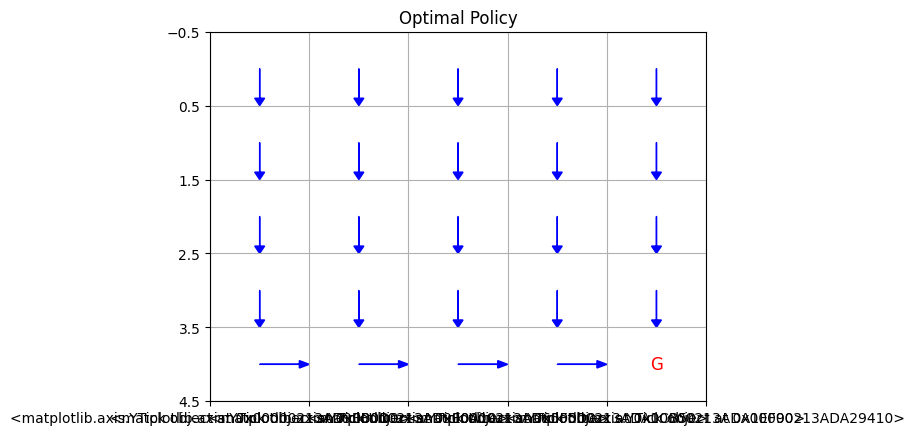

In [26]:
plot_policy(optimal_policy, goal_state)

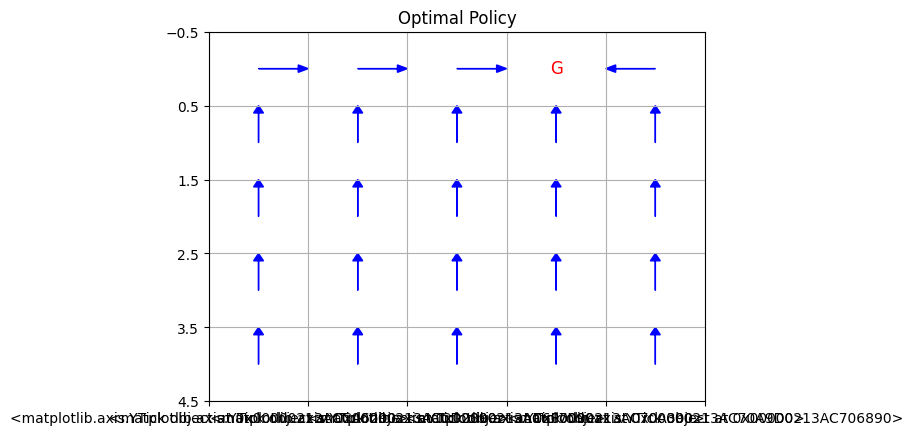

In [33]:
plot_policy(optimal_policy, goal_state)

#### 2. Q-Learning implementation of grid world environment

In [34]:
# Define the grid world environment

grid_size = (5, 5)
actions = ['up', 'down', 'left', 'right']
num_actions = len(actions)
alpha = 0.5  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 1.0  # Exploration rate
epsilon_decay = 0.85  # Decay rate for exploration
min_epsilon = 0.15  # Minimum exploration rate
num_episodes = 100  # Number of episodes for training

In [37]:
def reward(state, goal_state):
    if state == goal_state:
        return 10  # Reward for reaching the goal
    else:
        return -1  # Reward for every other step
    

def transition(state, action):
    x, y = state
    if action == 'up':
        x = max(x - 1, 0)
    elif action == 'down':
        x = min(x + 1, grid_size[0] - 1)
    elif action == 'left':
        y = max(y - 1, 0)
    elif action == 'right':
        y = min(y + 1, grid_size[1] - 1)
    return (x, y)

In [38]:
# Initialize Q-table

Q_table = np.zeros((grid_size[0], grid_size[1], num_actions))

In [44]:
# Convetionally set the goal state to the bottom-right corner of the grid world

# goal_state = (4, 4)
goal_state = (0, 3)

In [40]:
for episode in range(num_episodes):
    # Reset the agent to a random starting state
    state = (np.random.randint(0, grid_size[0]), np.random.randint(0, grid_size[1]))
    
    while state != goal_state:
        if np.random.rand() < epsilon:
            action_idx = np.random.randint(0, num_actions)  # Explore: random action
        else:
            action_idx = np.argmax(Q_table[state[0], state[1]])  # Exploit: best action
        
        action = actions[action_idx]
        
        next_state = transition(state, action)
        r = reward(next_state, goal_state)
        
        Q_table[state[0], state[1], action_idx] += alpha * (
            r + gamma * np.max(Q_table[next_state[0], next_state[1]]) - Q_table[state[0], state[1], action_idx]
        )
        
        state = next_state
    
    # Decay the exploration rate
    epsilon = max(epsilon * epsilon_decay, min_epsilon)


In [42]:
def plot_policy(Q_table, goal_state):
    fig, ax = plt.subplots()
    ax.set_xlim(-0.5, grid_size[1] - 0.5)
    ax.set_ylim(-0.5, grid_size[0] - 0.5)
    ax.set_xticks(np.arange(-0.5, grid_size[1], 1))
    ax.set_yticks(np.arange(-0.5, grid_size[0], 1))
    ax.grid(True)
    ax.invert_yaxis()  # Invert y-axis to match matrix indexing

    # Draw arrows for the optimal policy
    for x in range(grid_size[0]):
        for y in range(grid_size[1]):
            if (x, y) == goal_state:
                ax.text(y, x, 'G', ha='center', va='center', fontsize=12, color='red')
                continue
            action_idx = np.argmax(Q_table[x, y])
            action = actions[action_idx]
            if action == 'up':
                ax.arrow(y, x, 0, -0.4, head_width=0.1, head_length=0.1, fc='blue', ec='blue')
            elif action == 'down':
                ax.arrow(y, x, 0, 0.4, head_width=0.1, head_length=0.1, fc='blue', ec='blue')
            elif action == 'left':
                ax.arrow(y, x, -0.4, 0, head_width=0.1, head_length=0.1, fc='blue', ec='blue')
            elif action == 'right':
                ax.arrow(y, x, 0.4, 0, head_width=0.1, head_length=0.1, fc='blue', ec='blue')

    plt.title("Optimal Policy from Q-Learning")
    plt.show()

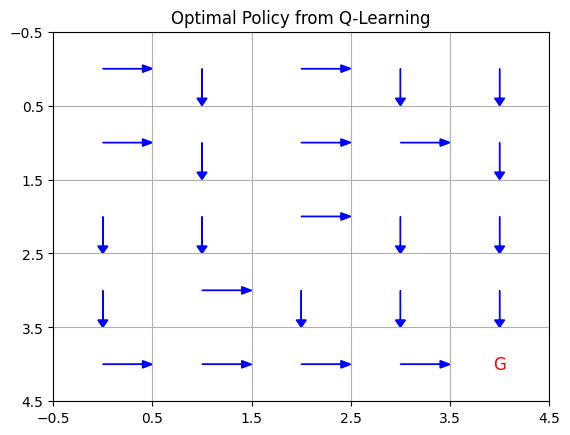

In [43]:
plot_policy(Q_table, goal_state)

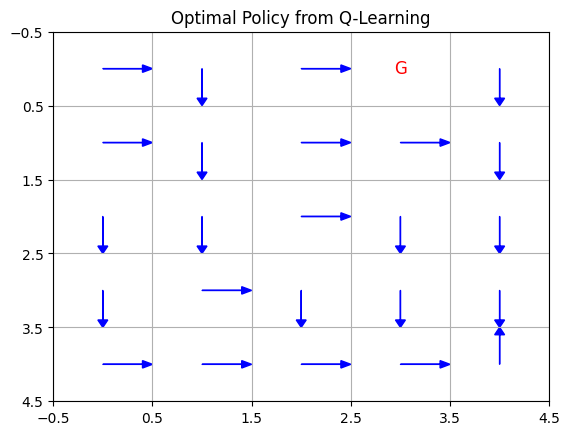

In [45]:
plot_policy(Q_table, goal_state)